## Image Convolution - Newman 7.9 pg322

![pg1](Newman-imagedeconv1.jpg)

![pg2](Newman-imagedeconv2.jpg)

![pg3](Newman-imagedeconv3.jpg)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

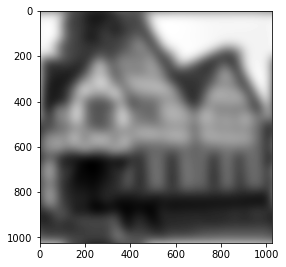

In [4]:
# Part (a) Density plot of image
b = np.loadtxt('blur.txt')
plt.figure(figsize=(4, 4))
plt.imshow(b, cmap='gray')
plt.tight_layout()

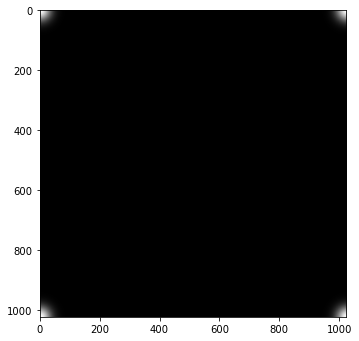

In [5]:
# Part (b) Gaussian point spread function
rows, cols = b.shape
sigma = 25
gauss = np.empty((rows, cols))
for i in range(rows):
    ip = i
    if ip > rows/2:
        ip -= rows  # bottom half of rows moved to negative values
    for j in range(cols):
        jp = j
        if jp > cols/2:
            jp -= cols  # right half of columns moved to negative values

        gauss[i, j] = np.exp(-.5*(ip**2 + jp**2)/sigma**2)  # compute gaussian

plt.figure(figsize=(5, 5))
plt.imshow(gauss, cmap='gray')
plt.tight_layout()

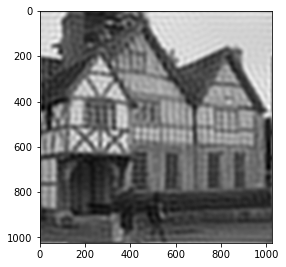

In [6]:
# Part (c) unblurring

# (iii) Fourier transforms of blurred-photo and psf
Fg = np.fft.rfft2(gauss)
Fb = np.fft.rfft2(b)

# (iv) Division
epsilon = 1e-3 #if psf is smaller than this, don't divide
Fa = 0*Fb
for kk in range(Fb.shape[0]):
    for ll in range(Fb.shape[1]):
        if abs(Fg[kk, ll]) > epsilon:
            Fa[kk, ll] = Fb[kk, ll]/Fg[kk, ll]/rows/cols
        else:
            Fa[kk, ll] = Fb[kk, ll]/rows/cols

# (v) Inverse Fourier transform
a = np.fft.irfft2(Fa)

# (vi) Display unblurred-photo
plt.figure(figsize=(4, 4))
plt.imshow(a, cmap='gray')
plt.tight_layout()

Note: this technique only works for pictures that are out-of-focus, in the sense that all of the information is present in the image, just scrambled.  This method cannot fix problems related to resolution limits.  I.e., if the details you are trying to retrieve are smaller than a pixel of the picture, you are out of luck.

## Newman 7.1 pg303 

Write Python programs to calculate the coefficients in the DFTs of the following periodic functions, sampled at N = 1000 evenly spaced points. Make plots of their amplitudes.

(a) A single cycle of a square wave with amplitude 1

(b) The sawtooth wave $y_n = n$

(c) The modulated sine wave $y_n = \sin(\pi n / N) \sin(20 \pi n / N)$

In [44]:
# from Newman's dft script
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [48]:
# part (a)
def square_wave(N):
    y = np.ones(N)*0.5
    n = np.arange(0, N, 1)
    y[n < N/2] = -0.5
    return y

# part (b)
def sawtooth(N):
    return np.arange(0, N, 1)

# part (c)
def modulated_sine(N):
    n = np.arange(0, N, 1)
    return np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N)

In [49]:
N = 1000  # number of points
dx = 1.0/N  # step size

f1 = square_wave(N)
a1 = np.abs(dft(f1))

f2 = sawtooth(N)
a2 = np.abs(dft(f2))

f3 = modulated_sine(N)
a3 = np.abs(dft(f3))

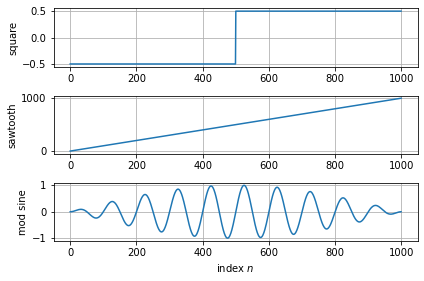

In [50]:
n = f2[0:N//2+1] #index

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(f1)
# plt.xlim(0, 30)
plt.grid()
plt.ylabel('square')
plt.subplot(3, 1, 2)
plt.plot(f2)
# plt.xlim(0, 30)
plt.grid()
plt.ylabel('sawtooth')
plt.subplot(3, 1, 3)
plt.plot(f3)
plt.ylabel('mod sine')
# plt.xlim(0, 30)
plt.grid()
plt.xlabel('index $n$')
plt.tight_layout()

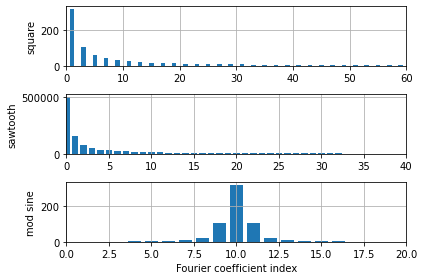

In [54]:
plt.figure()
plt.subplot(3, 1, 1)
plt.bar(n, a1)
plt.xlim(0, 60)
plt.ylabel('square')
plt.grid()
plt.subplot(3, 1, 2)
plt.bar(n, a2)
plt.xlim(0, 40)
plt.ylabel('sawtooth')
plt.grid()
plt.subplot(3, 1, 3)
plt.bar(n, a3)
plt.ylabel('mod sine')
plt.xlim(0, 20)
plt.xlabel('Fourier coefficient index')
plt.grid()

plt.tight_layout()

## Newman 7.8, pg 321

![pg4](Newman-diffraction1.jpg)

![pg5](Newman-diffraction2.jpg)

In [13]:
def q(z, alph):
    """ Function q at z with parameter alph """
    return np.sin(alph * z)**2

In [14]:
def ig(z, x, k, f, alph):
    """ Integrand at x, z, given wavenumber of light k, focal length of lens f, parameter alph """
    return q(z, alph)**0.5*np.exp(1j*k*x*z/f)

In [20]:
# Define constants for grating
spacing = 20e-6  # [m] Slit spacing
alpha = np.pi/spacing  # [rad/m] Wavenumber for slits
wg = 10 * spacing  # [m] Width of grating
lamda = 500e-9  # [m] Wavelength of the light
k_wn = 2 * np.pi / lamda  # [rad/m] Wavenumber of the light
ws = 0.1  # [m] Width of the screen
foc = 1.0  # [m] focal length of lens
N = 1000

In [21]:
# Expand for the larger domain:
expand = 10
WG = wg * expand
N_expand = N * expand
y = np.zeros(N_expand, dtype='float')
# create the grating array
for n in range(N):
    z = n*wg/N - wg/2
    y[n] = np.sqrt(q(z, alpha))

In [22]:
# calculate the diffraction pattern using an FFT
Int = np.abs(WG * np.fft.rfft(y)/N_expand)**2
xpoints = np.arange(0, ws/2, lamda*foc/WG)
Nd = len(xpoints)

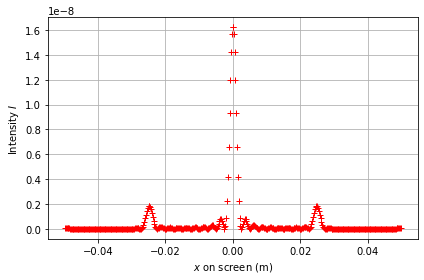

In [38]:
# Plot the result
plt.figure()
plt.plot(xpoints, Int[:Nd], 'r+')
plt.plot(-xpoints, Int[:Nd], 'r+')
plt.xlabel('$x$ on screen (m)')
plt.ylabel('Intensity $I$')
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
# Simpson's Method, for comparison

# set limits of integration for Simpson's rule, and other parameters
a, b = (-wg/2, wg/2)
h = (b-a)/N
result_simpson = np.empty((N + 1), float)
x_grid = []

# calculate the integral using Simpson's rule
for ii in range(N + 1):  # Main loop
    x = - ws/2 + ws*ii/N
    x_grid.append(x)
    s = ig(a, x, k_wn, foc, alpha) + ig(b, x, k_wn, foc, alpha)
    for k in range(1, N, 2):
        s += 4*ig(a + k*h, x, k_wn, foc, alpha)
    for k in range(2, N, 2):
        s += 2*ig(a + k*h, x, k_wn, foc, alpha)

    result_simpson[ii] = abs(h*s/3)**2

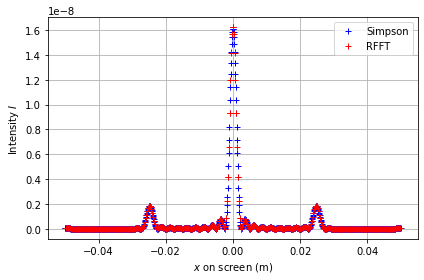

In [40]:
# Plot the result
plt.plot(x_grid, result_simpson, 'b+', label='Simpson')
plt.plot(xpoints, Int[:Nd], 'r+', label='RFFT')
plt.plot(-xpoints, Int[:Nd], 'r+')
plt.xlabel('$x$ on screen (m)')
plt.ylabel('Intensity $I$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()